# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import os
import matplotlib.image as mpimg
from PIL import Image
import time

In [2]:
# Load pickled data
# TODO: Fill this in based on where you saved the training and testing data
training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
print(type(train))
print(X_train.shape)
print(y_train.shape)
print(y_train[0])

<class 'dict'>
(34799, 32, 32, 3)
(34799,)
41


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
import csv
signdict = {}
with open('signnames.csv') as csvfile:
    rows = list(csv.reader(csvfile))
    for i in range(1, len(rows), 1):
        signdict[rows[i][0]] = rows[i][1]
n_classes = len(rows) - 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

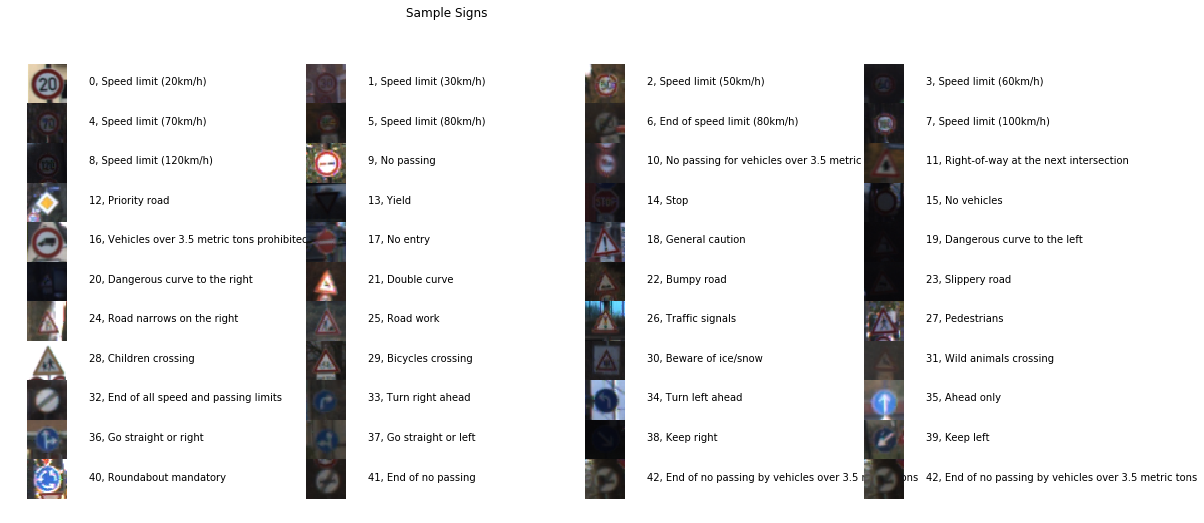

In [5]:
### Data exploration visualization code goes here.
# plot sample signs
d = dict()
for i in range(len(y_train)):
    if y_train[i] not in d:
        d[y_train[i]] = i
    if len(d) == n_classes:
        break

fig, axes = plt.subplots(11, 4, figsize=(20,8))
fig.suptitle('Sample Signs')
for index, ax in zip(list(range(n_classes+1)), axes.flat):
    if index >= n_classes:
        index = n_classes-1
    image = X_train[d[index]].squeeze()
    ax.imshow(image)
    #ax.set_title(index)
    ax.set_axis_off()
    text = '{}, {}'.format(index, signdict[str(index)])
    ax.text(s=text, x=50, y=16)

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

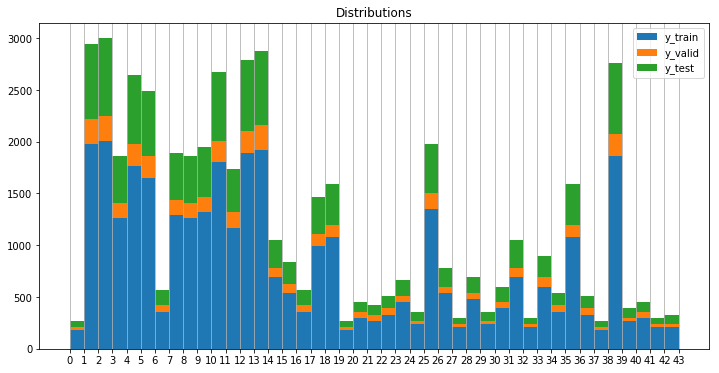

In [6]:
# plot distributions
plt.figure(figsize=(12,6))
plt.title("Distributions")
plt.hist([y_train, y_valid, y_test], bins=list(range(0, 44)), stacked=True)
data = ['y_train','y_valid','y_test']
plt.grid(True, axis='x',)
plt.legend(data)
plt.xticks(list(range(0, 44)))
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
# normalization
def normalize(X):
    return (X - [128, 128, 128]) / 128

X_train_norm = normalize(X_train)
X_valid_norm = normalize(X_valid)
X_test_norm  = normalize(X_test)

### Model Architecture

In [8]:
mu = 0
sigma = 0.1
EPOCHS = 20
BATCH_SIZE = 128
rate = 0.001

In [9]:
# features and labels
tf.reset_default_graph()
with tf.name_scope('input') as scope:
    x = tf.placeholder(tf.float32, (None,32,32,3), name='x')
    y = tf.placeholder(tf.int32, (None), name='y')
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32, name='k')

In [10]:
### my LeNet
L1 = 16
L2 = 32
with tf.name_scope('Conv1'):
    ## layer 1: input 32x32x3, output 28x28xL1
    conv1_W = tf.Variable(tf.truncated_normal(shape = [5, 5, 3, L1], mean=mu, stddev=sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(L1), name='conv1_b')
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
with tf.name_scope('Conv1_relu'):
    conv1 = tf.nn.relu(conv1)
with tf.name_scope('Conv1_avg_pool'):
    # activation + pooling output 14x14xL1
    conv1 = tf.nn.avg_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

with tf.name_scope('Conv2'):
    ## layer 2: output 10x10xL2
    conv2_W = tf.Variable(tf.truncated_normal(shape=[5,5,L1,L2], mean=mu, stddev=sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(L2), name='conv2_b')
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
with tf.name_scope('Conv2_relu'):    
    conv2 = tf.nn.relu(conv2)
with tf.name_scope('Conv2_avg_pool'):
    # activation + pooling output 5x5xL2
    conv2 = tf.nn.avg_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

with tf.name_scope('Flatten'):
    ## flatten output 5*5*L2
    fc0 = flatten(conv2)

with tf.name_scope('FC1'):
    ## layer 3: output 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=[5*5*L2, 120], mean=mu, stddev=sigma), name='fc1_W')
    fc1_b = tf.Variable(tf.zeros(120), name='fc1_b')
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
with tf.name_scope('FC1_relu'):
    # activation
    fc1 = tf.nn.relu(fc1)
with tf.name_scope('FC1_dropout'):
    fc1 = tf.nn.dropout(fc1, keep_prob)

with tf.name_scope('FC2'):
    ## layer 4: output 84
    fc2_W = tf.Variable(tf.truncated_normal(shape=[120, 84], mean=mu, stddev=sigma), name='fc2_W')
    fc2_b = tf.Variable(tf.zeros(84), name='fc2_b')
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
with tf.name_scope('FC2_relu'):
    # activation
    fc2 = tf.nn.relu(fc2)

with tf.name_scope('Output'):
    ## layer 5: output 43
    fc3_W = tf.Variable(tf.truncated_normal(shape=[84, 43], mean=mu, stddev=sigma), name='fc3_W')
    fc3_b = tf.Variable(tf.zeros(43), name='fc3_b')
    logits = tf.matmul(fc2, fc3_W) + fc3_b

In [11]:
# training pipeline
with tf.name_scope('loss_operation'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)

with tf.name_scope('train_operation'):
    optimizer = tf.train.AdamOptimizer(learning_rate=rate)
    train_operation = optimizer.minimize(loss_operation)

In [12]:
# model evaluation
with tf.name_scope('accuracy_operation'):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
saver = tf.train.Saver()
smallsaver = tf.train.Saver([conv1_W, conv1_b])

In [13]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))

    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
accuracy_history = []
with tf.Session() as sess:
    train_writer = tf.summary.FileWriter('./trainlog', sess.graph)
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        t0 = time.time()
        X_shuffle, y_shuffle = shuffle(X_train_norm, y_train)
        total_train_accuracy = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset+BATCH_SIZE
            batch_x, batch_y = X_shuffle[offset:end], y_shuffle[offset:end]
            sess.run(train_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.25})
            batch_accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            total_train_accuracy += batch_accuracy * len(batch_x)
        
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        train_accuracy = total_train_accuracy/num_examples
        accuracy_history.append((train_accuracy, validation_accuracy))
        
        print('EPOCH {}, time used: {:.2f} min, Train acc: {:.3f}, Valid acc: {:.3f}'.format(
            i+1, (time.time() - t0)/60, train_accuracy, validation_accuracy))
    
    test_accuracy = evaluate(X_test_norm, y_test)
    print('Test Accuracy = {:.3f}'.format(test_accuracy))
    saver.save(sess, './lenet')
    smallsaver.save(sess, './small')
    train_writer.close()
    print('Model saved')

Training...

EPOCH 1, time used: 0.10 min, Train acc: 0.373, Valid acc: 0.573
EPOCH 2, time used: 0.09 min, Train acc: 0.724, Valid acc: 0.747
EPOCH 3, time used: 0.09 min, Train acc: 0.853, Valid acc: 0.837
EPOCH 4, time used: 0.09 min, Train acc: 0.911, Valid acc: 0.865
EPOCH 5, time used: 0.09 min, Train acc: 0.939, Valid acc: 0.888
EPOCH 6, time used: 0.09 min, Train acc: 0.956, Valid acc: 0.917
EPOCH 7, time used: 0.09 min, Train acc: 0.966, Valid acc: 0.918
EPOCH 8, time used: 0.09 min, Train acc: 0.973, Valid acc: 0.932
EPOCH 9, time used: 0.09 min, Train acc: 0.978, Valid acc: 0.929
EPOCH 10, time used: 0.09 min, Train acc: 0.982, Valid acc: 0.933
EPOCH 11, time used: 0.09 min, Train acc: 0.985, Valid acc: 0.937
EPOCH 12, time used: 0.09 min, Train acc: 0.987, Valid acc: 0.945
EPOCH 13, time used: 0.09 min, Train acc: 0.988, Valid acc: 0.952
EPOCH 14, time used: 0.09 min, Train acc: 0.990, Valid acc: 0.941
EPOCH 15, time used: 0.09 min, Train acc: 0.991, Valid acc: 0.946
EPOCH 

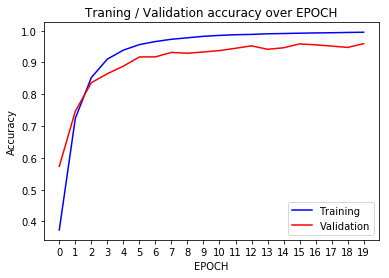

In [15]:
# plot training and validation accuracy trend over EPOCHs
hist = np.transpose(np.array(accuracy_history))
plt.plot(hist[0], 'b')
plt.plot(hist[1], 'r')
plt.title('Traning / Validation accuracy over EPOCH')
plt.legend(['Training', 'Validation'])
plt.ylabel('Accuracy')
plt.xlabel('EPOCH')
plt.xticks(list(range(0, len(hist[0]))))
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

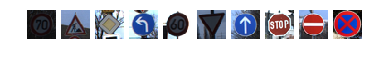

In [16]:
### Load the images and plot them here.
download_dir = 'download/'
fig, axes = plt.subplots(1,10)
images = []
for file, ax in zip(sorted(os.listdir(download_dir)), axes.flat):
    imgfile = download_dir + file
    img = Image.open(imgfile)
    # the original png is 80x80 so needs to be resized
    img.thumbnail((32,32), Image.ANTIALIAS)
    imgdata = np.asarray(img)
    images.append(imgdata)
    ax.imshow(img)
    ax.set_axis_off()
    
X_download = (np.array(images) - np.array([128,128,128])) / 128

#### Discussion of particular qualities of the images or traffic signs in the images that are of interest
The first 9 images are downloaded from GTSDB sites and are all 80x80 in png format. So down-sampling is needed to match the inputs requirements of our neural network. The images are better compared with samples of train set above, in terms of contrast, distortion, noise and sharpness. So it's expected the prediction will be on par with, in not better, than the training accuracy.

The last image, which is supposed to be a "No stopping" sign, is not in the training set. It'll be interesting to see how model predict given an sign it never learns. 

### Predict the Sign Type for Each Image

In [17]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
num_examples = len(X_download)
total_accuracy = 0
prediction_operation = tf.argmax(logits, 1)
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    prediction_output = sess.run(prediction_operation, feed_dict={x: X_download, keep_prob: 1.0})
    print(prediction_output)

for p in prediction_output:
    print(p, signdict[str(p)])

[ 4 25 12 34  3 13 35 14 17 38]
4 Speed limit (70km/h)
25 Road work
12 Priority road
34 Turn left ahead
3 Speed limit (60km/h)
13 Yield
35 Ahead only
14 Stop
17 No entry
38 Keep right


### Analyze Performance

In [18]:
# The accuracy is 100%. However, it's due to the fact that the image is downloaded from GTSDB website.
# The reason to not use images elsewhere is that it's hard to find real images as in GTSDB, 
# which can make the accuracy to be very poor.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    softmax = tf.nn.softmax(logits)
    top5_probabilities = sess.run(tf.nn.top_k(softmax, k=5), feed_dict={x: X_download, keep_prob: 1.0})
    for i, row in enumerate(top5_probabilities.indices):
        print('preditions for image {}: '.format(i+1))
        for j, index in enumerate(row):
            print('{}, {}({}) - {:.2f}'.format(j, signdict[str(index)], index, top5_probabilities.values[i][j]))
        print()

preditions for image 1: 
0, Speed limit (70km/h)(4) - 1.00
1, Speed limit (30km/h)(1) - 0.00
2, Speed limit (120km/h)(8) - 0.00
3, Speed limit (100km/h)(7) - 0.00
4, No vehicles(15) - 0.00

preditions for image 2: 
0, Road work(25) - 1.00
1, Bicycles crossing(29) - 0.00
2, Bumpy road(22) - 0.00
3, Yield(13) - 0.00
4, Wild animals crossing(31) - 0.00

preditions for image 3: 
0, Priority road(12) - 1.00
1, No passing for vehicles over 3.5 metric tons(10) - 0.00
2, Traffic signals(26) - 0.00
3, End of no passing(41) - 0.00
4, Right-of-way at the next intersection(11) - 0.00

preditions for image 4: 
0, Turn left ahead(34) - 1.00
1, Ahead only(35) - 0.00
2, Keep right(38) - 0.00
3, Go straight or right(36) - 0.00
4, End of no passing(41) - 0.00

preditions for image 5: 
0, Speed limit (60km/h)(3) - 1.00
1, Speed limit (80km/h)(5) - 0.00
2, Speed limit (50km/h)(2) - 0.00
3, Yield(13) - 0.00
4, No vehicles(15) - 0.00

preditions for image 6: 
0, Yield(13) - 1.00
1, No vehicles(15) - 0.00
2,

#### Prediction result discussion
The total prediction accuracy is 90%. The prediction for the first 9 images are all correct as expected. But for some images, the confidence of the prediction is not as high as others. For example, for image 9, "No entry", the first guess is 60% while for image 5, "60km/h" the first and second guess are 17% and 12% ("80km/h") respectively. This is due to the similarities of the candidates. For "No entry" sign, it can't find a candidate that matches it easily but one can argue that all the speed limit signs are similar to each other.

As for image 10, the result is more interesting. The first choice is "Priority road" (image 3) which is hardly close to the sign's blue background with red cross and circle. 3 possible reasons for this are

* Priority road is one of the most common signs in training set which distort the model
* the yellow diamond shape are somewhat related to the red cross
* the model is just not well trained

The next 4 guesses are probabibly due to they all have a blue background with thick lines in the center.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [20]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [21]:
# y = tf.placeholder(tf.float32, (None))
# k = tf.placeholder(tf.float32)
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None,32,32,3))
conv1_W = tf.Variable(tf.truncated_normal(shape = [5, 5, 3, L1], mean=mu, stddev=sigma), name='conv1_W')
conv1_b = tf.Variable(tf.zeros(L1), name='conv1_b')
conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
conv1 = tf.nn.relu(conv1)
smallsaver = tf.train.Saver()

with tf.Session() as sess:
    smallsaver.restore(sess, './small')
    print('Model restored.')
    outputFeatureMap(X_download[0:1], conv1)

NotFoundError: Key conv1_W not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]
	 [[Node: save/RestoreV2/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_11_save/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'save/RestoreV2', defined at:
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-2fa0e0ff1b8f>", line 9, in <module>
    smallsaver = tf.train.Saver()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1000, in __init__
    self.build()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1030, in build
    restore_sequentially=self._restore_sequentially)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 624, in build
    restore_sequentially, reshape)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 361, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 200, in restore_op
    [spec.tensor.dtype])[0])
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 441, in restore_v2
    dtypes=dtypes, name=name)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key conv1_W not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]
	 [[Node: save/RestoreV2/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_11_save/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


In [ ]:
with tf.Session() as sess:
    smallsaver.restore(sess, './small')
    print('Model restored.')
    outputFeatureMap(X_download[5:6], conv1)

In [ ]:
with tf.Session() as sess:
    smallsaver.restore(sess, './small')
    print('Model restored.')
    outputFeatureMap(X_download[6:7], conv1)